# Unsupervised learning - PCA and Clustering for US Arrests Dataset

### Exploratoring the data

**Data Understanding:** Understand the data by examining its dimensions (rows and columns), data types, and structure. Differentiate between categorical and numerical.

**Data Cleaning:** Identifying missing values and decide on strategies to handle them (e.g. removal, imputation, or substitution). Fixing data entry errors or duplicates. This dataset does not have an missing values, errors or inconsistencies.

**Data Visualization:** Using plots to understand the distribution of a single variable. Histograms, boxplots, and density plots for numerical data. Barplots and pie charts for categorical data. Histograms were used to understand the distribution of each variable of interest.

**Relationship Identification:** Correlation Analysis was used ti measure the strength and direction of relationships between variables.

**Data Transformation:** The data was normalised because most variables in the dataset did not exhibit a natural distribution model.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Understanding

In [2]:
# Loading the data and setting the column, 'City' as index
df = pd.read_csv("USArrests.csv", index_col="City")

# View the top 5 records
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
# Understanding the data type and dimensions of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


All columns except the City columns consist of numeric data points (integer and float). The 'City' column has an object as a Data type.

In [4]:
# Statistical metrics to understand the data
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Data Cleaning

In [5]:
# Determining null values
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
# Remove any duplicates
df = df.drop_duplicates()

From conducting a thorough Data Understanding and Data cleaning techniques to identify any missing values. The USArrests doesn't have any missing values

### Data visualisation

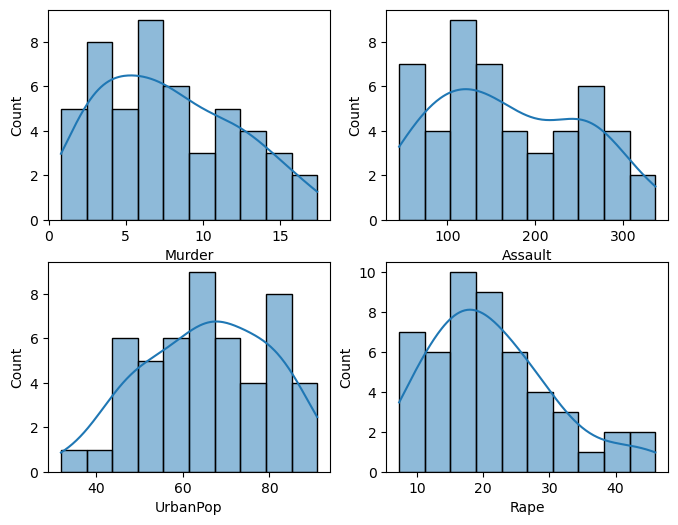

In [7]:
# Plotting the distribution of each numeric column
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax = ax.flatten()

sns.histplot(df['Murder'], bins = 10, ax= ax[0], kde=True)

sns.histplot(df['Assault'], bins = 10, ax= ax[1], kde=True)

sns.histplot(df['UrbanPop'], bins = 10, ax= ax[2], kde=True)

sns.histplot(df['Rape'], bins = 10, ax= ax[3], kde=True)

plt.tight_layout
plt.show()


None of the data in the column exhibits a normal distribution. So we will normalise the data set during data transformation.

### Determining Relationships


In [8]:
offences = df.index
labels = df.columns
labels

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [9]:
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


The heatmap below shows the correlation matrix of four variables: **Murder, Assault, UrbanPop, and Rape.** Correlation values range from -1 to 1:
    **1.0** Indicates a perfect positive correlaton.
    **0.0** Indicates no correlation.
    **-1.0** Indicates a perfect negative correlation.
    
1. **Murder and Assault (0.8019):**

    Strong positive correlation, this implies areas with higher assault rates tend to also have higher murder rates.
    
2. **Murder and UrbanPop (0.0696):**
    Weak correlation, this suggests that urban population is minimally related to murder rates.
    
3. **Murder and Rape (0.5636):**
    Moderate positive correlation, this suggests that murder and rape rates tend to increase together, but not as strongly as with assault.
    
4. **Assault and UrbanPop (0.2589):**
    Weak positive correlation. This means urban population has a small association with assault rates.
    
5. **Assault and Rape (0.6652):**
    Moderate positive correlation. This suggests that assault and rape rates are somewhat linked.
    
6. **UrbanPop and Rape (0.4113):**
    Moderate positive correlation. This suggests that urban population moderately correlates with rape rates.
    
#### Key insights

**Murder and Assault** have the strongest relationship, suggesting these crimes might co-occur or have shared causes.

**Urban population** has the weakest relationships overall, indicating that urbanization might not be a strong driver of these offenses.

The data implies that certain crimes, like assault and rape, might have overlapping environmental or societal factors.

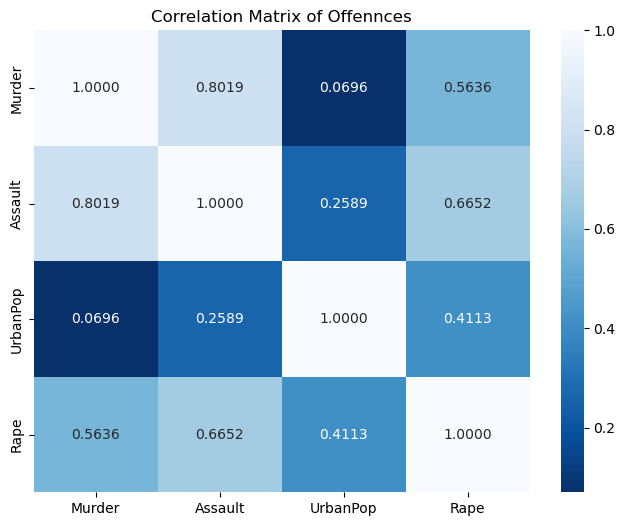

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues_r', fmt='.4f')
plt.title("Correlation Matrix of Offennces")
plt.show()

## Scaling and Applying PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique designed to simplify complex datasets with many featurs while retaining as much essential information as possible. It transforms the original data into new coordinate system defined by principal components, which are ordered by the amount of variance they capture. By selecting the top components, PCA reduces the dataset's dimensions, preserving the most significant patterns and variability. This makes it easier to analyze, and model high-dimensional data. PCA also helps in de-noising datasets by removing redundant or irrelevant information and combining correlated features into fewer uncorrelated components. It achieves this by computing the covariance matrix of the data, identifying the eigenvectors and eigenvalues, and projecting the data onto the direction of maximum variance. Since the determination of the principal components is based on finding the direction that maximises the variance, variables with variance that are much higher than the other variables tend to dominate the analysis purely due to their scale.

In [11]:
from sklearn.decomposition import PCA

np.set_printoptions(precision=2)

X = df.values.squeeze()

pca = PCA()

X_trans = pca.fit_transform(X)

pca_df = pd.DataFrame(X_trans)
pca_df.head()

,0,1,2,3
0,64.802164,11.448007,-2.494933,2.407901
1,92.827450,17.982943,20.126575,-4.094047
2,124.068216,-8.830403,-1.687448,-4.353685
3,18.340035,16.703911,0.210189,-0.520994
4,107.422953,-22.520070,6.745873,-2.811826


In [12]:
def biplot(score, coeff, labels=None, points=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max()-xs.min())
    scaley = 1.0/(ys.max()-ys.min())
    
    fig, ax = plt.subplots()
    ax.scatter(xs*scalex, ys*scaley, s=5)
    
    for i in range(0, len(xs)):
        txt = offences[i]
        ax.annotate(txt, (xs[i]*scalex, ys[i]*scaley))
        
    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'r', alpha = 0.5)
        if labels is None:
            ax.text(coeff[i, 0]* 1.15, coeff[i, 1]*1.15, "Var"+str(i+1), color='green', ha='center', va='center')
        
        else:
            ax.text(coeff[i, 0]*1.15, coeff[i, 1]*1.15, labels[i], color='g', ha='center', va='center')
            
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    
# Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

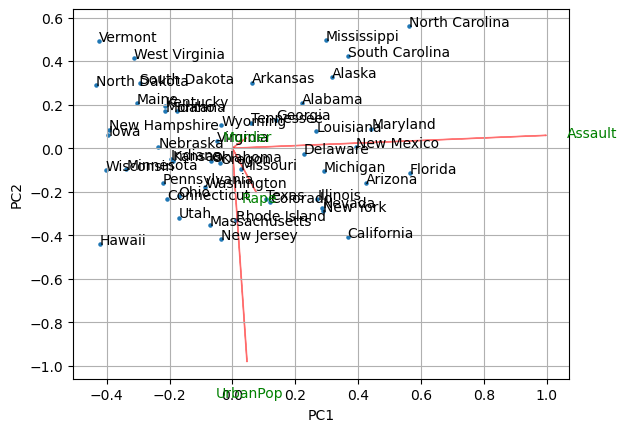

In [13]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(offences))
plt.show()

This biplot, generated from **Principal Component Analysis (PCA)**, provides insights into the relationships between U.S. states and the variables analysed (urban population, assault, murder, and rape). Thee **x-axis (PC1)** and **y-axis (PC2)** represents the first two principal components, which capture the largest variance in the dataset, with **PC1** explaining the most variance, followed by **PC2**. Each point corresponds to a U.S. state, and their positioning indicates similarities or differences based on the variables. States that are close to each other have similar profiles, while those farther apart are more distinct.

The red arrows represent te original variables, showing their direction and influence on the principal components. For example, the UrbanPop arrow points to the left and aligns negatively with **PC1**, indicating that states with higher urban populations tend to have lower **PC1 scores**. In contrast, the Assault arrow points positively along PC1, suggesting that states with higher assault rates have higher **PC1 scores**. States such as North Carolins, Mississippi, and South Carolina, located in the direction of the Assault variable, are strongly influenced by it. On the other hand, states like Hawaii and Vermont, positioned in the opposite direction, are less affected by assault rates or urban population.

Overall, this biplot reveals clusters and patterns, highlighting how different states are influenced by the underlying variables.

In [14]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pc1 = abs(pca.components_[0] )
pc2 = abs(pca.components_[1])

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df


,Features,PC1 Importance,PC2 Importance
0,Murder,0.04170,0.04482
1,Assault,0.99522,0.05876
2,UrbanPop,0.04634,0.97686
3,Rape,0.07516,0.20072


### Biplot with normalised data

In [15]:
from sklearn.preprocessing import MinMaxScaler
# Scalling the data
X_norm = MinMaxScaler().fit_transform(X) 

scaled_pca = PCA()
scaled_X_norm = scaled_pca.fit_transform(X_norm)

df_norm_pca = pd.DataFrame(scaled_X_norm)
df_norm_pca.head()

,0,1,2,3
0,0.29308,0.27318,-0.09860,0.04794
1,0.49730,0.22550,0.50154,-0.13309
2,0.46030,-0.20138,0.00303,-0.22320
3,-0.00600,0.27570,0.02873,-0.05064
4,0.61202,-0.40998,0.14326,-0.09344


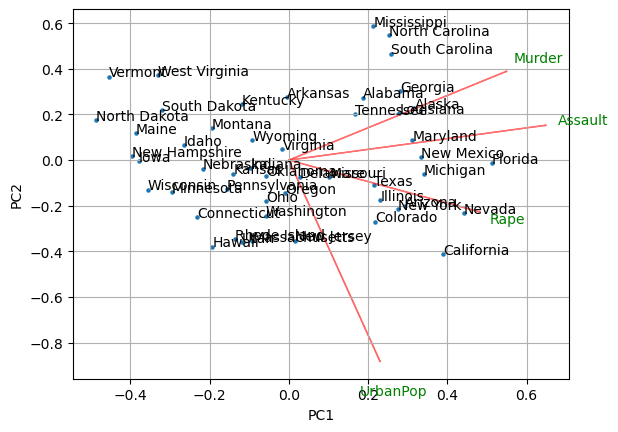

In [16]:
biplot(scaled_X_norm[:,0:2],np.transpose(scaled_pca.components_[0:2, :]),list(labels))
plt.show()

The figure above shows, the results of the normalized data results in far more variables being utilised to explain the variance. Also we see that the differet features cluster together in groups. Each point represents a U.S. state, and their positioning reflects similarities or differences in terms of crime rates and urban populations. States closer to one another share similar profiles, while those far apart are more distinct.

The red arrows, which represents the original variables, indicate their direction and strength of influence on the principal components. The arrows for Murder, Assault, and Rape point in a similar direction, toward the upper-right quadrant, suggesting a positive correllation among these crime-related variables. This implies that states wither higher scores in one these variables also tend to have higher scores in the others. In contrast, the UrbanPop arrow points downward, roughly opposite to the crome variables, indicating a weaker pr potentially negative correlation between urban population and crime rates as reflected in PC1 AND pc2

In [17]:
# Features importance

pc1 = abs(scaled_pca.components_[0])
pc2 = abs(scaled_pca.components_[1])

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.54750,0.38796
1,Assault,0.64593,0.15212
2,UrbanPop,0.22956,0.88044
3,Rape,0.47992,0.22620


The table above shows how each variable is important for each PC. UrbanPop and Murder contributes more for PC importance.

Text(0.5, 1.0, 'Cumulative Explained Variance')

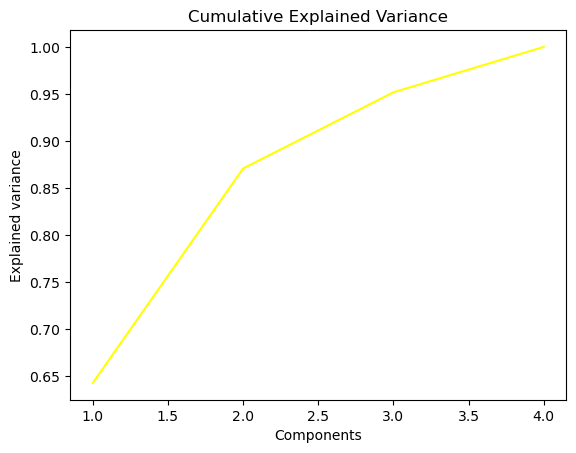

In [18]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(scaled_pca.explained_variance_ratio_ )+1),
         np.cumsum(scaled_pca.explained_variance_ratio_),
         c='yellow')
plt.title("Cumulative Explained Variance")

The curve above starts steeply as, indicating that the first few components explains a significant proportion of the variance. As the number of components increase, the curve tends to flattten, meaning as additional componets contribute less to the total explained variance.

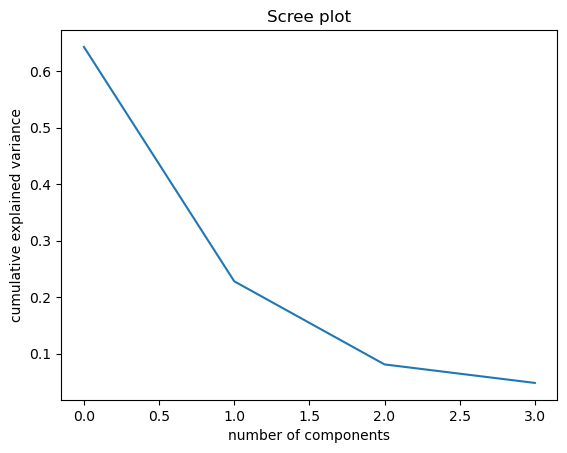

In [19]:
# Scree plot
plt.plot(scaled_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The diagram above shows that as the number of components increases, cumulative explained variance tends to zero, so for the analysis, only two PC's were chosen. This is because two PCs adequately provied enough information without any redundancy. The figure shows that the data is less 'noisy' because few componets captures the most variance.

In [20]:
df_pca = pd.DataFrame(X_trans[:, 0:5], index=df.index)
df_pca.head()

,0,1,2,3
City,,,,
Alabama,64.80216,11.44801,-2.49493,2.40790
Alaska,92.82745,17.98294,20.12657,-4.09405
Arizona,124.06822,-8.83040,-1.68745,-4.35369
Arkansas,18.34004,16.70391,0.21019,-0.52099
California,107.42295,-22.52007,6.74587,-2.81183


# Cluster Analysis

Here we will perform Hierarchical Clustering and K-means with the USArrests dataset and compare the results

## Hierarchical Clustering

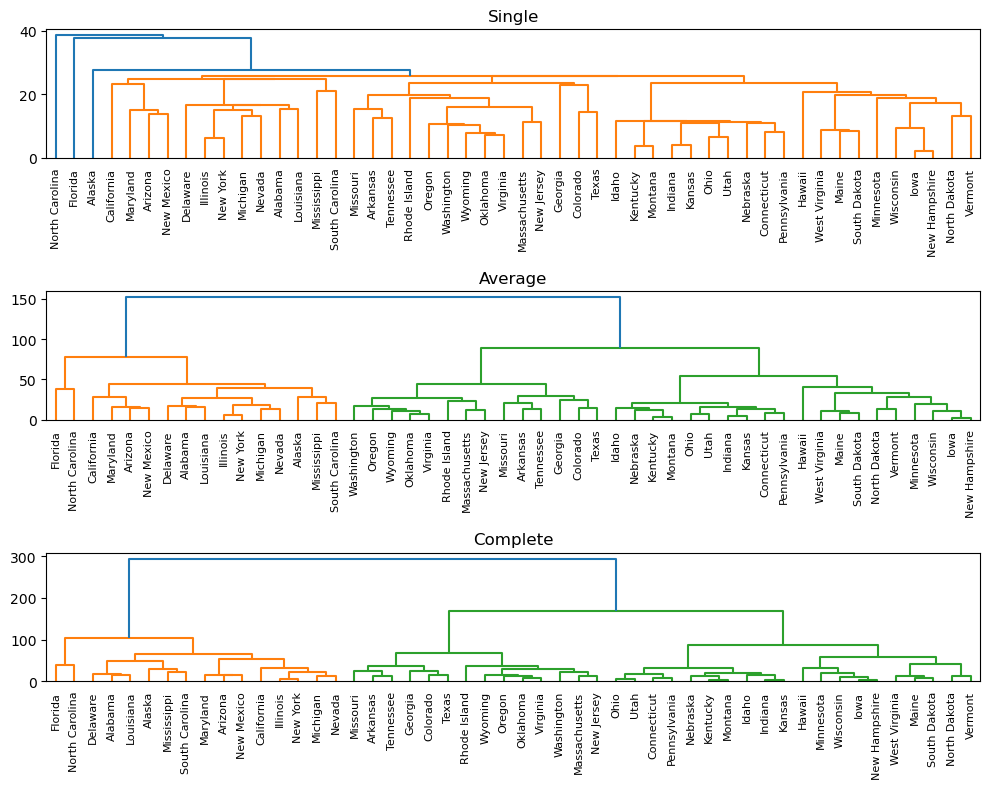

In [21]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df_pca)

fig, ax = plt.subplots(3, 1, figsize=(10, 8))
dendrogram(linkage(df_pca, method='single'), labels=df_pca.index, ax=ax[0])
ax[0].set_title('Single')

dendrogram(linkage(df_pca, method='average'), labels=df_pca.index, ax=ax[1])
ax[1].set_title('Average')

dendrogram(linkage(df_pca, method='complete'), labels=df_pca.index, ax=ax[2])
ax[2].set_title('Complete')

plt.tight_layout()
plt.show()

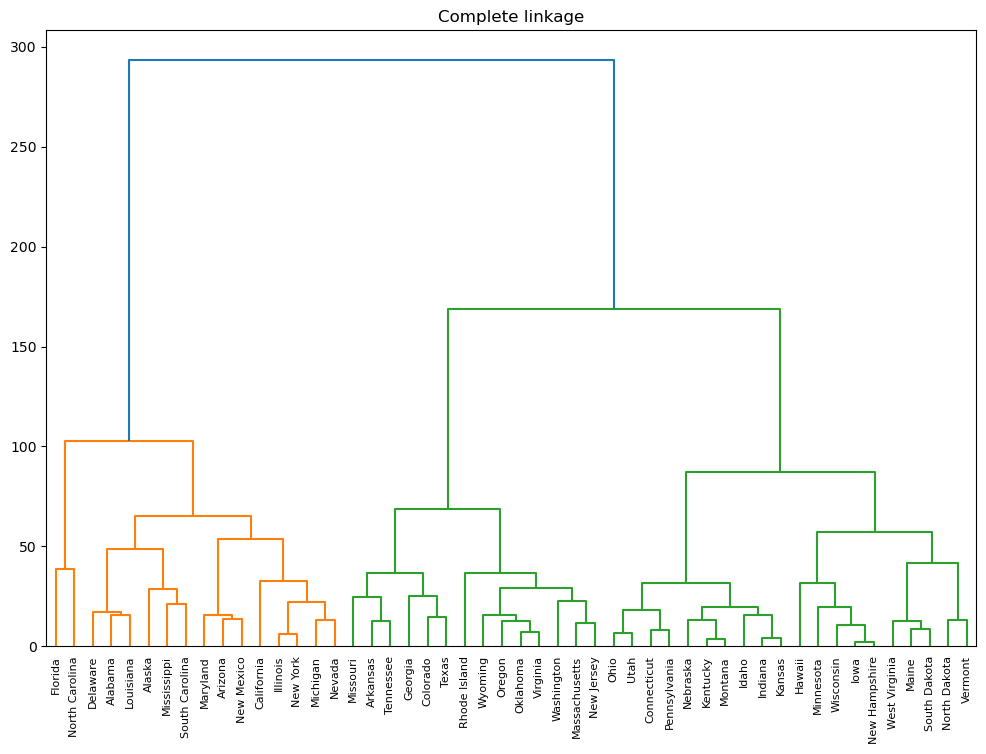

In [22]:
plt.figure(figsize=(12, 8))
plt.title("Complete linkage")
dendrogram(linkage(df_pca, method='complete'), labels=df_pca.index)
plt.show()


The figure above shows, how states are grouped together based score of the variables being examined. These variables are UrbanPop, Murder, Rape and Assault. For example, South Carolina and Mississippi, will show similar crime-related offences.

# K-means Clustering

K-means is a very popular clustering partitioning algorithm that is fast and efficient and scales well for large datasets. It ii an iterative process, so observations can switch between clusters while the algorithm runs until it converges at a local optimum. This method is not robust when it comes to noise data and outliers and is not suitable for clusters with non-convex shapes. Another drawback with K-means is the necessity of specifying K in advance.


### Selecting K

The value of K will be selecteced based on the silhouette score. The K value of a scatter plot with a high silhouette score will be the optimal K value, which will be selected 

In [23]:
from sklearn.cluster import KMeans

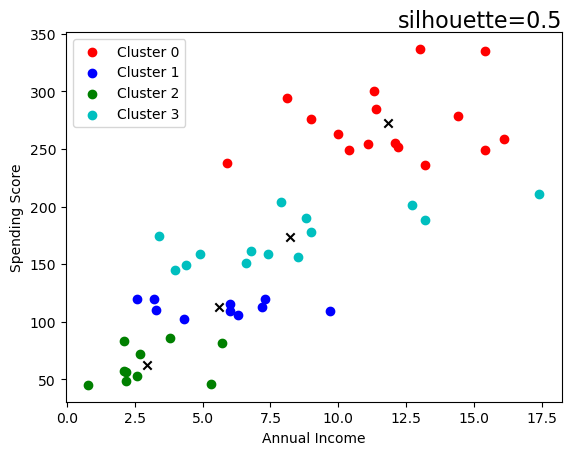

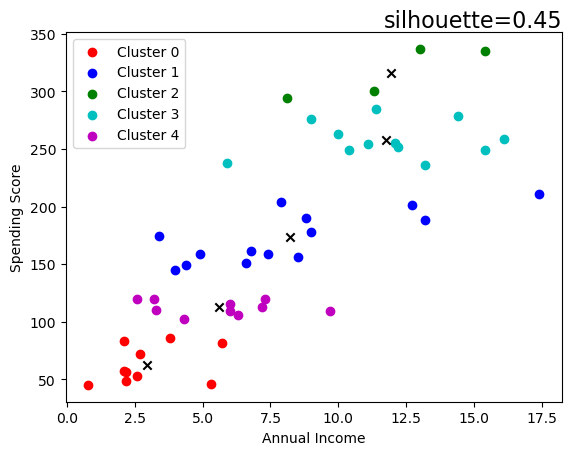

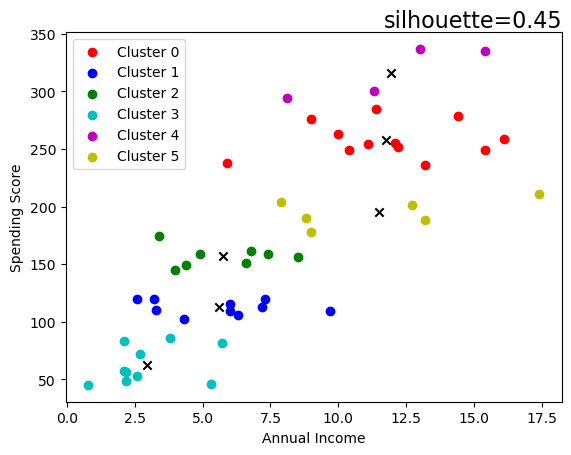

In [24]:
def scatter_Kmeans(x, k, r=100):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'), 2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

for k in range(4,7):
  scatter_Kmeans(X, k, r=0)
  
    
# Adapted from HyperionDev course material

From the diagrams above we see that the best silhouette score is achieved when K=4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


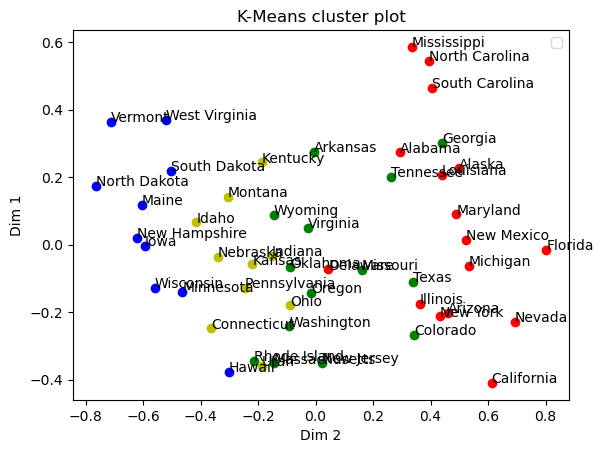

In [26]:
x = scaled_X_norm[:, 0]
y = scaled_X_norm[:, 1]

# Fit k-means
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=100)
cluster_labels = kmeans.fit_predict(df_pca)
cent = kmeans.cluster_centers_

# Plot clusters

fig, ax = plt.subplots()
colours='rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = offences[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

From the K-Means clusetr plot above, North Carolina, South Carolina and Mississippi are grouped together. This suggests that these cities exhibit similar crime-related variables examined (murder, rape, and assault).

# Conclusion

Looking at the plots of the two clustering techniques performed. The outcomes of both analyses show similar results